In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')
data_dir = "gdrive/MyDrive/PROJETO/NovoDATASET2"

Mounted at /content/gdrive


#Imports do codigo

In [2]:
# Imports
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from skimage.morphology import thin
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
import math

#Direção entre 2 pontos

In [3]:
def get_direction(prev_point, point):
    dx = point[0] - prev_point[0]
    dy = point[1] - prev_point[1]
    angle = math.atan2(dy, dx)
    angle_degrees = math.degrees(angle)
    
    # Arredondar o ângulo para um dos valores discretos correspondentes
    if angle_degrees < 0:
        angle_degrees += 360
    
    if angle_degrees >= 337.5 or angle_degrees < 22.5:
        return 0  # Leste
    elif 22.5 <= angle_degrees < 67.5:
        return 1  # Nordeste
    elif 67.5 <= angle_degrees < 112.5:
        return 2  # Norte
    elif 112.5 <= angle_degrees < 157.5:
        return 3  # Noroeste
    elif 157.5 <= angle_degrees < 202.5:
        return 4  # Oeste
    elif 202.5 <= angle_degrees < 247.5:
        return 5  # Sudoeste
    elif 247.5 <= angle_degrees < 292.5:
        return 6  # Sul
    elif 292.5 <= angle_degrees < 337.5:
        return 7  # Sudeste


#Codigo da cadeia

In [4]:
def codigodacadeia(contours):
  # Extrair o código da cadeia de cada contorno
  chain_codes = []
  for contour in contours:
      contour = np.squeeze(contour)  # Remover dimensão redundante
      chain_code = []
      prev_point = contour[-1]  # Ponto inicial
      for point in contour:
          direction = get_direction(prev_point, point)  # Função para calcular a direção entre dois pontos
          chain_code.append(direction)
          prev_point = point
      chain_codes.append(chain_code)

  print(chain_code)

#Metodo de processamento de imagem escolhido

In [7]:
def reading_img_in_datasets(path):

  # Verifica as pastas dentro da classe escolhida
  Train_path = os.listdir(path)

  #Para cada imagem dentro da classe escolhida
  for filename in Train_path:

    # Carregar a imagem colorida
    img = cv2.imread(os.path.join(path, filename))
    img = np.array(img, dtype=np.uint8)

    # Apply bilateral filter with d = 7, 
    # sigmaColor = sigmaSpace = 60.
    img = cv2.bilateralFilter(img, 7, 60, 60)

    # Converter a imagem para escala de cinza
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Realizar a limiarização na imagem em escala de cinza aplicando OTSU
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Aplicar a detecção de bordas de Canny na imagem binarizada
    edges = cv2.Canny(thresh, 100, 200)
    
    # Inverter as cores da imagem binária
    edges_inv = cv2.bitwise_not(edges)

    # Aplicar a transformada de abertura para limpar a imagem
    kernel = np.ones((7,7),np.uint8)
    opening = cv2.morphologyEx(edges_inv, cv2.MORPH_OPEN, kernel)

    # Aplicar a transformada de gradiente morfológico
    gradient = cv2.morphologyEx(opening, cv2.MORPH_GRADIENT, kernel)
    
    # Encontrar os contornos na imagem
    contours, hierarchy = cv2.findContours(gradient, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    imgs_orig_result = cv2.hconcat([cv2.resize(gray, (256,256)),
                                    cv2.resize(gradient, (256,256))])
                                    
    # Mostrar a imagem resultante
    cv2_imshow(imgs_orig_result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


    #aplicando codio da cadia
    codigodacadeia(contours)

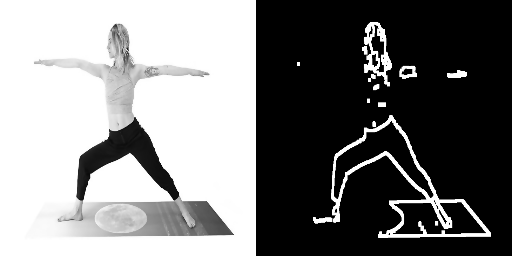

[6, 7, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 3, 4, 2, 0, 1, 2, 0, 1, 2, 3, 2, 3, 2, 3, 4, 2, 0, 1, 2, 0, 1, 2, 3, 4, 3, 5, 6, 4, 5, 7, 0, 6, 7, 0, 6, 7, 6, 7, 6, 5, 4, 5, 6, 5, 6, 4, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 7, 0, 6, 7, 6, 7, 0, 6, 7, 6, 5, 6, 5]


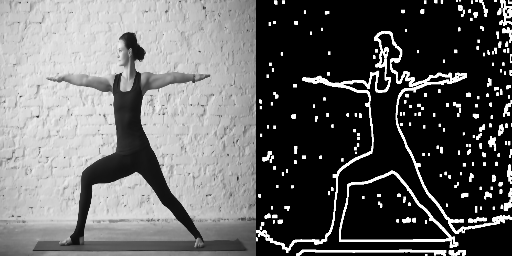

[4, 2, 1, 0, 1, 0, 6, 4, 3, 5]


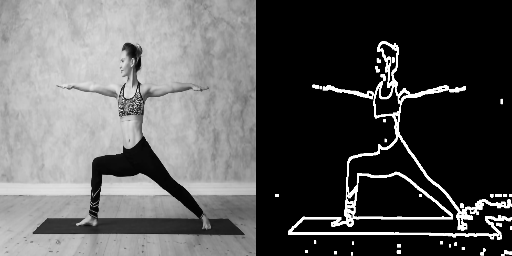

[4, 3, 2, 3, 2, 3, 2, 0, 7, 6, 7, 6, 4, 5, 6, 5]


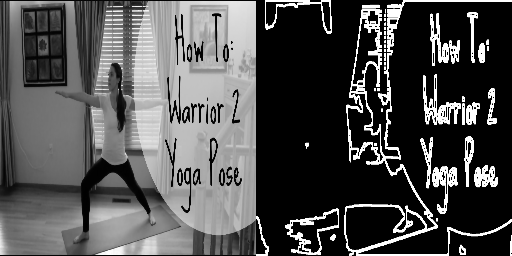

[7, 0, 1, 3, 4, 3, 4, 3, 4, 3, 2, 3, 4, 5, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5, 4, 5, 4, 3, 4, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 5, 6, 4, 3, 5, 6, 5, 6]


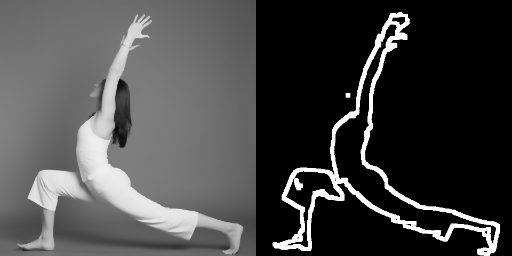

[0, 7, 0, 1, 2, 1, 3, 4, 3, 4, 3, 4, 3, 5, 6, 5, 6, 4, 5, 4, 5, 7, 6, 7, 6, 7]


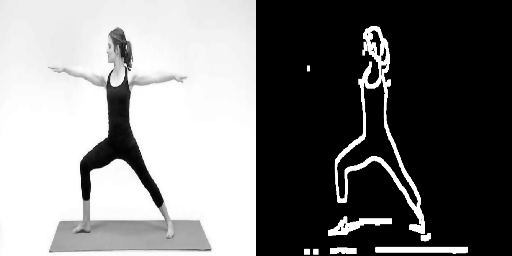

[0, 7, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 2, 3, 2, 3, 4, 5, 4, 5, 6, 5, 6, 5, 6, 4, 5, 4, 3, 4, 2, 3, 2, 3, 5, 6, 5, 7, 0, 7, 0, 6, 5, 4, 5, 7, 0, 7, 0, 7]


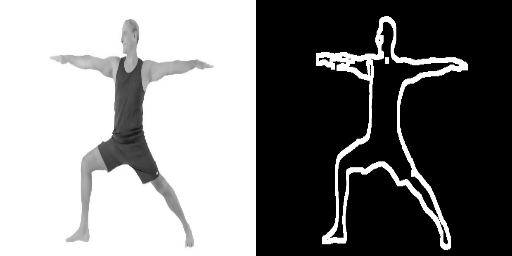

[4, 2, 0, 6]


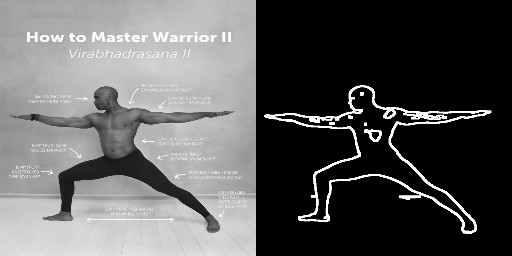

[4, 3, 2, 3, 2, 1, 2, 0, 7, 6]


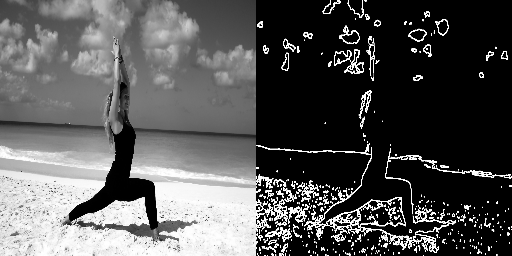

[6, 7, 1, 0, 1, 0, 1, 3, 4, 3, 4, 3, 4, 5, 6, 7]


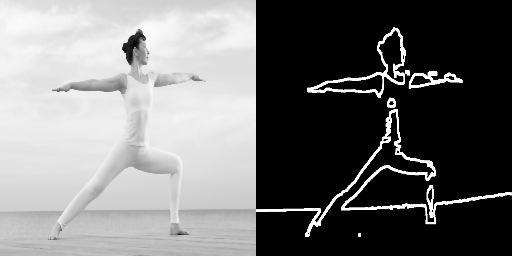

[6, 7, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1, 2, 3, 2, 0, 1, 2, 1, 3, 2, 1, 2, 1, 2, 1, 2, 1, 3, 2, 1, 2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 5, 6, 5, 6, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 6, 7, 0, 1, 0, 1, 0, 7, 0, 1, 2, 3, 4, 3, 4, 3, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 7, 0, 7, 6, 7, 6, 7, 6, 7, 6, 5, 4, 5, 4, 5, 4, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 4, 5, 4, 5, 6, 7, 6, 7, 6, 7, 6, 7, 0, 7, 0, 7, 0, 6, 7, 6, 7, 6, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 6, 7, 0, 7, 0, 7]


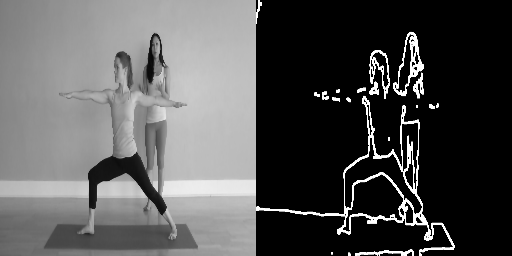

[4, 2, 3, 4, 3, 4, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 0, 7, 6, 7, 6, 7, 6, 7, 0, 7, 0, 7, 6]


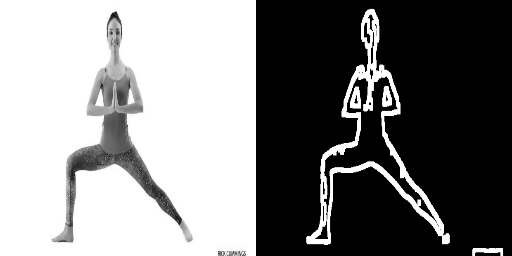

[0, 7, 0, 1, 2, 1, 3, 4, 3, 2, 1, 2, 1, 0, 1, 2, 3, 5, 6, 4, 5, 4, 5, 6, 7, 6, 4, 5, 7]


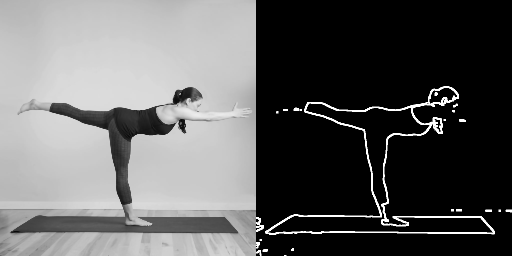

[4, 3, 4, 2, 3, 2, 0, 7, 0, 7, 6, 5, 4, 5]


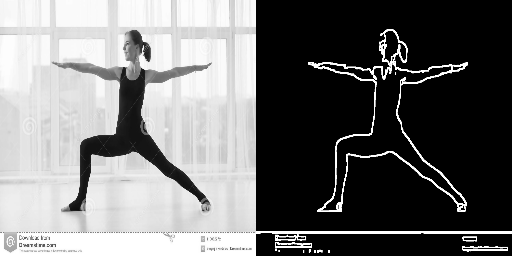

[0, 7, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 5, 6, 4, 5, 6, 4, 5, 6, 5, 6, 5, 6, 4, 5, 6, 5, 6, 5, 6, 7, 6, 7, 6, 5, 4, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 4, 2, 3, 2, 3, 4, 3, 4, 2, 3, 2, 3, 4, 2, 3, 2, 3, 2, 3, 4, 2, 3, 2, 3, 2, 3, 5, 6, 5, 6, 5, 4, 5, 4, 5, 4, 5, 4, 5, 6, 4, 2, 3, 4, 5, 7, 6, 7, 6, 7, 6, 7, 6, 5, 6, 7, 6, 7, 6, 7, 6, 5, 4, 5, 6, 7, 6, 7, 6, 5, 6, 5, 6, 7, 0, 7, 0, 7, 0, 7, 0, 7]


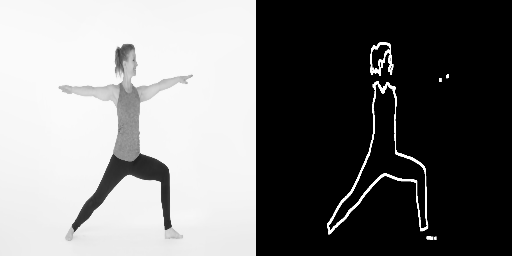

[0, 7, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 4, 2, 3, 2, 3, 2, 3, 2, 3, 4, 5, 4, 5, 4, 3, 4, 3, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 4, 5, 6, 4, 5, 6, 5, 4, 2, 3, 4, 5, 6, 4, 5, 6, 4, 5, 6, 5, 6, 5, 6, 5, 6, 7, 6, 7, 6, 7, 6, 7, 0, 7, 0, 7, 0, 1, 0, 1, 0, 7, 6, 7, 0, 7, 0, 7]


In [8]:
def main():
    # código do programa aqui
    reading_img_in_datasets('gdrive/MyDrive/PROJETO/NovoDATASET2/TRAIN2/warrior2')

if __name__ == "__main__":
    main()


#conferindo  o codigo da CADEIA


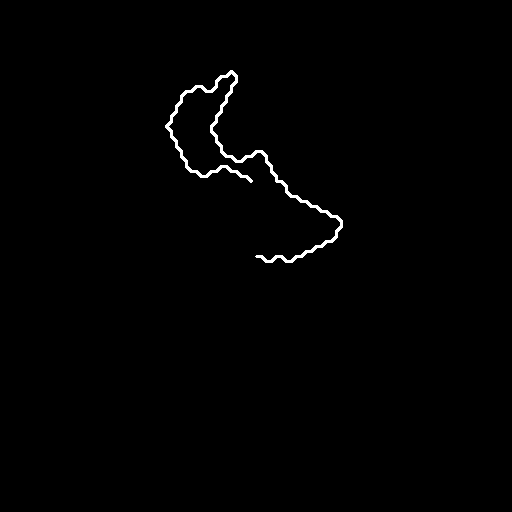

In [ ]:
import cv2
import numpy as np

def get_displacement(direction):
    # Mapeie a direção para o deslocamento correspondente
    if direction == 0:
        return (1, 0)  # Leste
    elif direction == 1:
        return (1, -1)  # Nordeste
    elif direction == 2:
        return (0, -1)  # Norte
    elif direction == 3:
        return (-1, -1)  # Noroeste
    elif direction == 4:
        return (-1, 0)  # Oeste
    elif direction == 5:
        return (-1, 1)  # Sudoeste
    elif direction == 6:
        return (0, 1)  # Sul
    elif direction == 7:
        return (1, 1)  # Sudeste

# Código da cadeia para desenhar a letra "A"
chain_code =[0, 7, 0, 1, 0, 7, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 4, 2, 3, 2, 3, 2, 3, 4, 5, 4, 5, 4, 3, 4, 3, 2, 3, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 5, 4, 5, 6, 5, 4, 3, 4, 5, 4, 5, 6, 5, 6, 5, 6, 5, 7, 6, 7, 6, 7, 6, 7, 6, 7, 0, 7, 0, 1, 0, 1, 0, 7, 0, 7, 0, 7]



# Criar uma imagem em branco para desenhar o contorno
height, width = 512, 512  # Tamanho da imagem
image = np.zeros((height, width), dtype=np.uint8)

# Ponto inicial do contorno
start_point = (width // 2, height // 2)

# Desenhar o contorno com base no código da cadeia
prev_point = start_point
for direction in chain_code:
    # Obter o deslocamento com base na direção
    dx, dy = get_displacement(direction)

    # Comprimento do segmento do contorno
    segment_length = 5

    # Calcular o próximo ponto do contorno com base no deslocamento e comprimento do segmento
    next_point = (prev_point[0] + dx * segment_length, prev_point[1] + dy * segment_length)

    # Desenhar o segmento do contorno na imagem
    cv2.line(image, prev_point, next_point, 255, 2)

    # Atualizar o ponto anterior para o próximo ponto
    prev_point = next_point

# Exibir a imagem com o contorno desenhado
cv2_imshow( image)
cv2.waitKey(0)
cv2.destroyAllWindows()
